二维正态分布
手动计算均值、标准差、偏度、峰度： [ 0.16151942 -0.08538389] [0.99971968 0.82011926] [-0.10908381  1.3096013 ] [0.49058553 0.74574485]
函数计算均值、标准差、偏度、峰度： [ 0.16151942 -0.08538389] [0.99971968 0.82011926] [-0.10908381  1.3096013 ] [0.40378161 1.22597055]
样本总数： 30.0


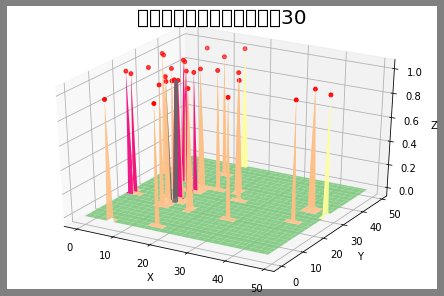

In [5]:
#  -*- coding:utf-8 -*-
import numpy as np
from scipy import stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def calc_statistics(x):
    n = x.shape[0] #样本个数

    m = 0#期望
    m2 = 0#平方的期望
    m3 = 0#三次方的期望
    m4 = 0#四次方的期望
    for t in x:
        #向量的加法
        m += t
        m2 += t*t
        m3 += t**3
        m4 += t**4
    m /= n
    m2 /= n
    m3 /= n
    m4 /= n

    #标准差 = E((X - E(X))^2) = E(X^2) - E(X)^2
    sigma = np.sqrt(m2-m*m)
    #求偏度  = E((X-E(X))^3) = (m3 - 3*m*m2 + 2*m**3) / sigma**3
    skew = (m3 - 3*m*sigma**2 - m**3) / sigma**3
    #求峰度
    kurtosis = m4 / sigma**4 - 3
    print('手动计算均值、标准差、偏度、峰度：', m, sigma, skew, kurtosis)

    #使用系统函数验证
    mu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0)
    skew = stats.skew(x)
    kurtosis = stats.kurtosis(x)
    return mu,sigma,skew,kurtosis



if __name__ == '__main__':
    # d = np.random.randn(100000)
    # print(d)
    # mu, sigma, skew, kurtosis = calc_statistics(d)
    # print('函数计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis)
    # # 一维直方图
    # mpl.rcParams[u'font.sans-serif'] = 'SimHei'
    # mpl.rcParams[u'axes.unicode_minus'] = False
    # #画出统计直方图
    # #bins直方图的条数
    # #density=True 画出趋势图
    # #y1:x1每个中每个值出现的次数的度量
    # #x1:d的值的范围
    # y1, x1, dummy = plt.hist(d, bins=50,density=True, color='g', alpha=0.75)
    # t = np.arange(x1.min(), x1.max(), 0.05)
    # #绘制标准正态分布的曲线
    # y = np.exp(-t ** 2 / 2) / math.sqrt(2 * math.pi)
    # plt.plot(t, y, 'r-', lw=2)
    # plt.title(u'高斯分布，样本个数：%d' % d.shape[0])
    # plt.grid(True)
    # plt.show()

    #二维
    print("二维正态分布")
    d = np.random.randn(100000, 2)
    mu, sigma, skew, kurtosis = calc_statistics(d)
    print('函数计算均值、标准差、偏度、峰度：', mu, sigma, skew, kurtosis)
    # 二维图像
    N = 50
    #density：edges中每个值出现的次数的度量
    density, edges = np.histogramdd(d, bins=[N, N])
    print('样本总数：', np.sum(density))
    density /= density.max()
    x = y = np.arange(N)
    t = np.meshgrid(x, y)

    fig = plt.figure(facecolor='gray')
    ax = fig.add_subplot(111, projection='3d')
    #x,y,z
    ax.scatter(t[0], t[1], density, c='r', s=15 * density, marker='o', depthshade=True)
    # ax.plot_surface(t[0], t[1], density, cmap=cm.Accent, rstride=2, cstride=2, alpha=0.9, lw=0.75)
    # ax.set_xlabel(u'X')
    # ax.set_ylabel(u'Y')
    # ax.set_zlabel(u'Z')
    # plt.title(u'二元高斯分布，样本个数：%d' % d.shape[0], fontsize=20)
    # plt.tight_layout(0.1)
    plt.show()

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})

In [12]:
#导入seaborn自带iris数据集
data=sns.load_dataset("iris")  
print(data)
#为了方便大家观看，把列名换成中文的
data.rename(columns={"sepal_length":"sepal_length",
                     "sepal_width":"sepal_width",
                     "petal_length":"petal_length",
                     "petal_width":"petal_width",
                     "species":"label"},inplace=True)
kind_dict = {
    "setosa":"setosa",
    "versicolor":"versicolor",
    "virginica":"virginica"
}
data["label"] = data["label"].map(kind_dict)
data.head() #数据集的内容如下 

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


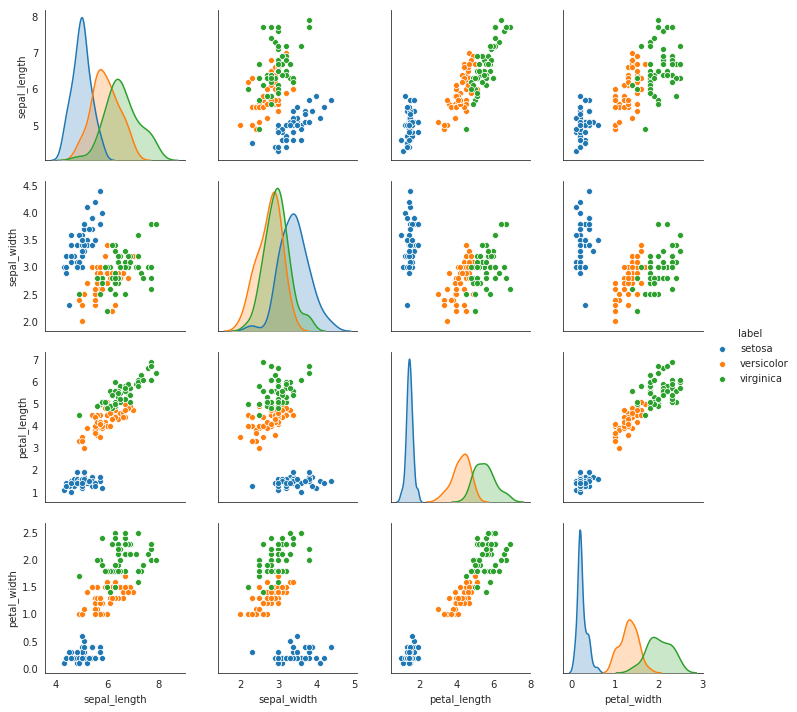

In [13]:
sns.pairplot(data,hue="label") 